In [ ]:
from collections import defaultdict
from datetime import datetime
import json
from tqdm import tqdm
from sys import getsizeof
import heapq
from tqdm import tqdm
from collections import defaultdict
import heapq as heap
import numpy as np
from graph import Graph
from graph import dijkstra
import networkx as nx
import matplotlib.pyplot as plt
from graph import *

# 1. Data

In this section we read the Stack Overflow files and we create a graph. For every row we add two nodes (one for the first user and one for the second), then we connect them with an edge with the date as attribute. We also add the weight to the edges. Every time two users interact we add 1 to the weight of their edge. 
After creating the graph, we write it in a json file to not have it in memory.

## Graph class:
We chose to use a class to represent the graph. The graph object it is built starting from a dictionary. The graph is represented by a dictionary of dict that has this structure:

- **{node_1: {node_2: {dictionary of attributes}}}**.

Where node_1 and node_2 are adjacent nodes and the dictionary of attributes represents the attributes of the edges such as the weight or the date etc.

### Creating 3 graph from each file

## Answers to questions:  sx-stackoverflow-a2q.txt

In [ ]:
f = open('graph/sx-stackoverflow-a2q.txt')
g1 = Graph()

for i in tqdm(f.readlines()):
    line = i.split(' ')
    u1 = line[0]
    u2 = line[1]
    time = datetime.fromtimestamp(int(line[2].rstrip('\n')))
    format_time = time.strftime('%Y%m%d')
    g1.add_vertex(u1)
    g1.add_vertex(u2)
    g1.add_edge_with_attr(u1,u2,date=format_time)

with open('a2q.json','w') as f:
    json.dump(g1.graph, f)

100%|██████████████████████████████████████████████████████████████████| 17823525/17823525 [02:44<00:00, 108177.05it/s]


In [ ]:
start = '20080801'
end = '20080831'

In [ ]:
f = open('graph/sx-stackoverflow-a2q.txt')
g_intervall = Graph()

for i in tqdm(f.readlines()):
    line = i.split(' ')
    u1 = line[0]
    u2 = line[1]
    time = datetime.fromtimestamp(int(line[2].rstrip('\n')))
    format_time = time.strftime('%Y%m%d')
    if start<format_time<end:
        g_intervall.add_vertex(u1)
        g_intervall.add_vertex(u2)
        g_intervall.add_edge_with_attr(u1,u2,date=format_time)
        
with open('a2q_interval.json','w') as f:
    json.dump(g_intervall.graph, f)

100%|██████████████████████████████████████████████████████████████████| 17823525/17823525 [01:32<00:00, 191969.71it/s]


In [ ]:
len(g_intervall.get_vertex())

2081

## Comments to answer: sx-stackoverflow-c2a.txt

In [ ]:
f = open('graph/sx-stackoverflow-c2a.txt')
g2 = Graph()

for i in tqdm(f.readlines()):
    line = i.split(' ')
    u1 = line[0]
    u2 = line[1]
    time = datetime.fromtimestamp(int(line[2].rstrip('\n')))
    format_time = time.strftime('%Y%m%d')
    g2.add_vertex(u1)
    g2.add_vertex(u2)
    g2.add_edge_with_attr(u1,u2,date=format_time)
    
with open('c2a.json','w') as f:
    json.dump(g2.graph, f)

100%|██████████████████████████████████████████████████████████████████| 25405374/25405374 [03:32<00:00, 119295.45it/s]


In [ ]:
f = open('graph/sx-stackoverflow-c2a.txt')
g2_intervall = Graph()

for i in tqdm(f.readlines()):
    line = i.split(' ')
    u1 = line[0]
    u2 = line[1]
    time = datetime.fromtimestamp(int(line[2].rstrip('\n')))
    format_time = time.strftime('%Y%m%d')
    if start<format_time<end:
        g2_intervall.add_vertex(u1)
        g2_intervall.add_vertex(u2)
        g2_intervall.add_edge_with_attr(u1,u2,date=format_time)
        
with open('c2a_interval.json','w') as f:
    json.dump(g2_intervall.graph, f)

100%|██████████████████████████████████████████████████████████████████| 25405374/25405374 [02:11<00:00, 192541.20it/s]


In [ ]:
len(g2_intervall.get_vertex())

179

## Comments to questions: sx-stackoverflow-c2q.txt

In [ ]:
f = open('graph/sx-stackoverflow-c2q.txt')
g3 = Graph()

for i in tqdm(f.readlines()):
    line = i.split(' ')
    u1 = line[0]
    u2 = line[1]
    time = datetime.fromtimestamp(int(line[2].rstrip('\n')))
    format_time = time.strftime('%Y%m%d')
    g3.add_vertex(u1)
    g3.add_vertex(u2)
    g3.add_edge_with_attr(u1,u2,date=format_time)
    
with open('c2q.json','w') as f:
    json.dump(g3.graph, f)

100%|██████████████████████████████████████████████████████████████████| 20268151/20268151 [02:48<00:00, 120072.47it/s]


In [ ]:
f = open('graph/sx-stackoverflow-c2q.txt')
g3_intervall = Graph()

for i in tqdm(f.readlines()):
    line = i.split(' ')
    u1 = line[0]
    u2 = line[1]
    time = datetime.fromtimestamp(int(line[2].rstrip('\n')))
    format_time = time.strftime('%Y%m%d')
    if start<format_time<end:
        g3_intervall.add_vertex(u1)
        g3_intervall.add_vertex(u2)
        g3_intervall.add_edge_with_attr(u1,u2,date=format_time)
        
with open('c2q_interval.json','w') as f:
    json.dump(g3_intervall.graph, f)

100%|██████████████████████████████████████████████████████████████████| 20268151/20268151 [01:45<00:00, 191950.83it/s]


In [ ]:
len(g3_intervall.get_vertex())

279

## Merging the graphs togheter

To merge the graph togheter we choose to read the 3 files sequentially. We add a node _v_ if the node is not in the graph. We add an edge between _v_ and _u_ with weight equal to 1 if _v_ and _u_ interact for the first time. If there is an edge between _v_ and _u_ and in the file there is another interaction between the same nodes we choose to add 1 to the weight of the edge from _v_ to _u_. We have also chosen to add the formatted date yyyymmdd as the label of the edge. If two nodes have interacted on different days, the date already associated with the edge is updated with the date of the new interaction

In [ ]:
g_full = Graph()

In [ ]:
g_full = Graph()
f = open('graph/sx-stackoverflow-a2q.txt')

for i in tqdm(f.readlines()):
    line = i.split(' ')
    u1 = line[0]
    u2 = line[1]
    time = datetime.fromtimestamp(int(line[2].rstrip('\n')))
    format_time = time.strftime('%Y%m%d')
    g_full.add_vertex(u1)
    g_full.add_vertex(u2)
    g_full.add_edge_with_attr(u1,u2,date=format_time)
    
    
f2 = open('graph/sx-stackoverflow-c2a.txt')

for i in tqdm(f2.readlines()):
    line = i.split(' ')
    u1 = line[0]
    u2 = line[1]
    time = datetime.fromtimestamp(int(line[2].rstrip('\n')))
    format_time = time.strftime('%Y%m%d')
    g_full.add_vertex(u1)
    g_full.add_vertex(u2)
    g_full.add_edge_with_attr(u1,u2,date=format_time)
    
f3 = open('graph/sx-stackoverflow-c2q.txt')

for i in tqdm(f3.readlines()):
    line = i.split(' ')
    u1 = line[0]
    u2 = line[1]
    time = datetime.fromtimestamp(int(line[2].rstrip('\n')))
    format_time = time.strftime('%Y%m%d')
    g_full.add_vertex(u1)
    g_full.add_vertex(u2)
    g_full.add_edge_with_attr(u1,u2,date=format_time)

100%|███████████████████████████████████████████████████████████████████| 20268151/20268151 [05:52<00:00, 57421.52it/s]


In [ ]:
with open('merged_graph.json','w') as f:
    json.dump(g_full.graph, f)

## Memory and run time problems:

To avoid memory and running time problems we decide to cut the graph while we are reading it. To do this, we choose an interval of time, then while we are reading the file we add nodes and edges for users that had an interaction between the start date and the end date.

We merge the 3 subgraphs in the same way of the full graph.



In [ ]:
g_intervall = Graph()

In [ ]:
f1 = open('graph/sx-stackoverflow-a2q.txt')

for i in tqdm(f1.readlines()):
    line = i.split(' ')
    u1 = line[0]
    u2 = line[1]
    time = datetime.fromtimestamp(int(line[2].rstrip('\n')))
    format_time = time.strftime('%Y%m%d')
    if start<format_time<end:
        g_intervall.add_vertex(u1)
        g_intervall.add_vertex(u2)
        g_intervall.add_edge_with_attr(u1,u2,date=format_time)
        

f2 = open('graph/sx-stackoverflow-c2a.txt')

for i in tqdm(f2.readlines()):
    line = i.split(' ')
    u1 = line[0]
    u2 = line[1]
    time = datetime.fromtimestamp(int(line[2].rstrip('\n')))
    format_time = time.strftime('%Y%m%d')
    if start<format_time<end:
        g_intervall.add_vertex(u1)
        g_intervall.add_vertex(u2)
        g_intervall.add_edge_with_attr(u1,u2,date=format_time)
    
f3 = open('graph/sx-stackoverflow-c2q.txt')

for i in tqdm(f3.readlines()):
    line = i.split(' ')
    u1 = line[0]
    u2 = line[1]
    time = datetime.fromtimestamp(int(line[2].rstrip('\n')))
    format_time = time.strftime('%Y%m%d')
    if start<format_time<end:
        g_intervall.add_vertex(u1)
        g_intervall.add_vertex(u2)
        g_intervall.add_edge_with_attr(u1,u2,date=format_time)
        
with open('merged_graph_interval.json','w') as fout:
    json.dump(g_intervall.graph, fout)

100%|██████████████████████████████████████████████████████████████████| 20268151/20268151 [01:42<00:00, 197840.84it/s]


We choose to represent our graph as a nested dictionary: for every key we have a dictionary as value, representing all the adjacent nodes to the user that is represented by the key. Every edge has attached another dictionary that represent the labels of the edge.

Here we show an example of our graph's structure. For example, the user "72" interacted once with user "9" on the 2nd of August 2008 (so, the weight is set to 1) and three times with user number "58" on three different days (so, the weight associated to their relationship is 3).

In [ ]:
print_dict = {}
for k in g_intervall.get_vertex()[0:8]:
    print_dict[k] = g_intervall.get_graph()[k]
print_dict

{'72': {'9': {'date': '20080802', 'weight': 1},
  '48': {'date': '20080802', 'weight': 1},
  '58': {'date': '20080802,20080805,20080806', 'weight': 3},
  '204': {'date': '20080805', 'weight': 1},
  '269': {'date': '20080805', 'weight': 1},
  '95': {'date': '20080806', 'weight': 1},
  '308': {'date': '20080806', 'weight': 1},
  '406': {'date': '20080806', 'weight': 1},
  '116': {'date': '20080806', 'weight': 1},
  '1384652': {'date': '20080809', 'weight': 1},
  '840': {'date': '20080812', 'weight': 1},
  '432': {'date': '20080812', 'weight': 1},
  '1031': {'date': '20080812', 'weight': 1},
  '428190': {'date': '20080812', 'weight': 1},
  '673': {'date': '20080812', 'weight': 1},
  '547': {'date': '20080812', 'weight': 1},
  '538': {'date': '20080813', 'weight': 1},
  '277': {'date': '20080814', 'weight': 1},
  '1147': {'date': '20080814', 'weight': 1},
  '305': {'date': '20080814,20080819', 'weight': 2},
  '115': {'date': '20080814', 'weight': 1},
  '1154': {'date': '20080815', 'weight'

# **2. Implementation of the backend**

## Functionality 1 - Get the overall features of the graph

We work with the a2q graph but on the interval of time in the range of one month.

Our functionality takes as input a graph and returns a table with many information about said graph.
These information are:
- Whether the graph is directed or not: we simply check sequentially the edges so that if we find one case such that A-->B, but the opposite does not sussist, we say that the graph is directed and we stop
- The number of users (which is the number of nodes in the graph)
- The number of answers and comments (which is the number of edges in the graph)
- The average number of links for each node (computed as total number of edges divided by the total number of nodes)
- Density degree (computed as $\frac {m}{n*(n-1)}$, where $m$ refers to the total amount of edges in the graph, and $n*(n-1)$ refers to the maximum number of possible edges in the graph
- Whether the graph is sparse or not: we decided to define a graph as "sparse" if its density degree was less than 0.5

In [ ]:
with open('a2q_interval.json') as f:
    one_file = json.load(f)
graph_one_file = Graph(one_file)

In [ ]:
graph_one_file.func_1()

╒════════════╤══════════════╤═════════════════════════╤══════════════════════╤══════════════════╤═══════════╕
│ Directed   │   # of users │   # of answers/comments │   Average # of links │   Density degree │ Sparse?   │
╞════════════╪══════════════╪═════════════════════════╪══════════════════════╪══════════════════╪═══════════╡
│ True       │         2081 │                   13384 │              6.43152 │       0.00309208 │ True      │
╘════════════╧══════════════╧═════════════════════════╧══════════════════════╧══════════════════╧═══════════╛


## Functionality 2 - Find the best users!

### Degree Centrality:

We compute the degree centrality of a node as its degree.

The degree of a node is simply the number of "connections" it has with other nodes in the network, and as such it is computed as the total number of adjacent nodes it possesses.
This notion changes a bit for weighted networks, since it's possible for weighted networks to compute the degree of a node as the sum of the weights of the edges that link our node to other nodes in the network: this measure is often referred to as "strenght" of a node. We chose not to utilize the weighted degree though, as it would have proven harder to normalize it correctly and thus making it more difficult to compare it to the other centrality measures.

In [ ]:
with open('merged_graph_interval.json') as f:
    merged = json.load(f)
graph_merged_interval = Graph(merged)

In [ ]:
graph_merged_interval.func_2('72','20080801','20080808','DegreeCentrality')

╒═══════════════════╤════════╤══════════════════╤════════════════╕
│ Interval          │   User │ Metric           │   Metric score │
╞═══════════════════╪════════╪══════════════════╪════════════════╡
│ 20080801-20080808 │     72 │ DegreeCentrality │      0.0110101 │
╘═══════════════════╧════════╧══════════════════╧════════════════╛


0.011010052656773576

### Closeness Centrality

The closeness centrality of a node is computed as the normalized average value of all the shortest paths associated between the node taken into consideration and the other nodes of the network. As such, the formula to calculate the closeness centrality of a node is $C_c(i) = \frac{n-1} {\sum^n_{j=1} d(i,j)}$,
where $d(i,j)$ refers to the shortest path between two generic nodes, and $n$ refers to the total number of nodes in the network.

In [ ]:
graph_merged_interval.func_2('72','20080801','20080808','ClosenessCentrality')

╒═══════════════════╤════════╤═════════════════════╤════════════════╕
│ Interval          │   User │ Metric              │   Metric score │
╞═══════════════════╪════════╪═════════════════════╪════════════════╡
│ 20080801-20080808 │     72 │ ClosenessCentrality │      0.0011325 │
╘═══════════════════╧════════╧═════════════════════╧════════════════╛


0.0011325028312570782

In [ ]:
graph_merged_interval.func_2('72','20080801','20080808','PageRank')

insert number of steps: 
1500
#sink 1733
converge
╒═══════════════════╤════════╤══════════╤════════════════╕
│ Interval          │   User │ Metric   │   Metric score │
╞═══════════════════╪════════╪══════════╪════════════════╡
│ 20080801-20080808 │     72 │ PageRank │     0.00567989 │
╘═══════════════════╧════════╧══════════╧════════════════╛


0.005679885795531579

### Betweennes Centrality

The betweenness centrality of a node represents the number of times said node "finds" itself on the shortest path between two other nodes.
As such, for a generic node $i$, we compute this measure as $B_c(i) = \sum_{j<k} \frac{g_{jk} (i)}{g_jk}$, where $g_{jk}$ refers to the number of shortest paths between the nodes $j$ and $k$, and $g_{jk} (i)$ refers to the number of said shortest paths that go through node $i$

In [ ]:
graph_merged_interval.func_2('72','20080801','20080803','Betweeness')

100%|██████████| 13670/13670 [00:00<00:00, 555259.88it/s]


6.579804082321373e-05

In [ ]:
graph_merged_interval.func_2('72','20080805','20080807','Betweeness')

100%|██████████| 13670/13670 [00:00<00:00, 470554.59it/s]


0.00023315891120978524

### Result analysis

The node we took into consideration has a pretty low value for every metric we considered, suggesting that it is not a very "central" (thus important) node for our network's structure. Considering this, the highest value is found relatively to the degree centrality, while being significantly lower for closeness, betweenness and pagerank. This could mean that while being moderately connected to the other nodes in the network, our node fails to find itself on the shortest path between other nodes, and the shortest paths between it and other nodes are not so short after all. This could indicate a user that likes to interact with other users, but whose contribution is not found very useful to the other users in the network.

## Functionality 3 - Shortest Ordered Route 

In [ ]:
def ordered_walk(graph, seq, start, end):
    """
    :param graph: a graph
    :param seq: a list with a sequence of nodes that need to be visited
    :param start: the starting node
    :param end: the ending node
    :return:
        total_path: a list with the nodes in the walk from the starting node to the ending node
        passing through the sequence of nodes provided as input
  """
    # final path
    total_path = [start]

    # shortest path between starting node and first node in the sequence
    path = dijkstra(graph, start, seq[0])[0]
    # add to total path (without repeating starting node)
    total_path.extend(path[1:])

    # for each node in the sequence
    # find shortest path between that node and the following node in the sequence
    for p in range((len(seq)-1)):
      path = dijkstra(graph, seq[p], seq[p+1])[0] 
      # add path to total_path
      total_path.extend(path[1:])

    # shortest path between last node in the sequence and ending node
    path = dijkstra(graph, seq[-1], end)[0]
    total_path.extend(path[1:])

    return total_path

In [ ]:
sequence = ["67","35"]
route = ordered_walk(merged_graph_interval, sequence, start = "72", end="308")
print (route)

['72', '116', '192', '51', '67', '83', '91', '35', '91', '308']


## Functionality 4 -  Disconnecting graphs

In this functionality we disconnect two users in a graph. To do that, we make use of our version of Karger's randomized algorithm, adapted to the peculiarities of our graph. What we did was basically randomly selecting a couple of adjacent nodes, contract them into a single super-node (and updating the weight of the edges accordingly), and repeat this process until we end up with only two nodes. The weight of the edges between thees two last nodes is the cut indentified by the algorithm to disconnect the graph. Since we need to disconnect two nodes passed as an input in the function, we check at the end if the nodes are in different partitions: if so, we return the result.
Of course, with this being a random algorithm, there's a very low chance that the cut identified is the actual minimum cut. To circumvent this, we run the algorithm many times (ideally, n^2log(n) times) and then select the minimum value between all the iterations. 

Note that we are not retrieving the smallest number of edges needed, but the smallest cost needed.

The sub-graph we select for Functionality 4 is the graph including the interactions among users between the 1st and the 3rd of August, 2008. 

In [ ]:
merged_interval.get_graph_in_intervall('20080801','20080803')

In [ ]:
nodes = list(merged_interval.get_graph().keys())
edges = []
weights = {}
# take values from original dictionary and add edges
for k, v in merged_interval.get_graph().items():
  for el in v:
    edges.append((k, el))
    # add weight to edge
    w = v.get(el)
    weight = w.get('weight')
    weights[(k, el)] = weight


We work on a dictionary called **weights**, containing all the edges in the graph and the weights associated to each of them. This dictionary will get iteratively updated within the contract functions to take into account the new weights defining edges after a contraction took place.

In [ ]:
weights

{('100', '106'): 1,
 ('100', '91'): 1,
 ('101', '105'): 1,
 ('106', '71'): 1,
 ('106', '96'): 1,
 ('109', '106'): 1,
 ('109', '109'): 1,
 ('111', '199'): 1,
 ('111', '91'): 1,
 ('115', '146637'): 1,
 ('115', '9'): 1,
 ('116', '106'): 1,
 ('116', '157'): 1,
 ('116', '61'): 2,
 ('116', '91'): 1,
 ('117', '106'): 1,
 ('117', '115'): 1,
 ('118', '115'): 1,
 ('119', '91'): 1,
 ('122', '115'): 1,
 ('122', '122'): 1,
 ('122', '136'): 1,
 ('123', '72'): 1,
 ('124', '49'): 1,
 ('13', '25'): 1,
 ('134', '134'): 1,
 ('135', '25'): 1,
 ('136', '136'): 1,
 ('136', '151'): 1,
 ('136', '25'): 1,
 ('136', '49'): 1,
 ('136', '91'): 1,
 ('137', '40'): 1,
 ('137', '91'): 1,
 ('143', '77'): 1,
 ('144', '2'): 1,
 ('146270', '72'): 1,
 ('146637', '30'): 1,
 ('146637', '37'): 1,
 ('146637', '59'): 1,
 ('147', '111'): 1,
 ('147', '136'): 1,
 ('149', '91'): 1,
 ('150', '83'): 1,
 ('153', '147'): 1,
 ('154', '111'): 1,
 ('154', '184'): 1,
 ('154', '25'): 1,
 ('154', '78'): 1,
 ('154', '83'): 1,
 ('156', '134'):

In [ ]:
def contract(graph, v, w, weight_dict):
  
  # create dictionaries for nodes interested by the contraction
  outwards = {}
  inwards = {}
  interested = {}
  
  # update dictionaries
  for el in weight_dict:
    if el[0] == v:
      interested[el] = weight_dict[el]      
    if el[0] == w:
      interested[el] = weight_dict[el]

  # update weights of edges going out of the contracted nodes
  for i in interested:
    second = i[1]
    if second not in outwards:
      outwards[second] = 0
      for key, value in interested.items():
        if key[1] == second:
            outwards[second] += value
  
  # remove keys that we don't need
  if v in outwards.keys():
    del outwards[v]

  if w in outwards.keys():
    del outwards[w]

  # update dictionaries
  for el in weight_dict:
    if el[1] == v:
      interested[el] = weight_dict[el]
    if el[1] == w:
      interested[el] = weight_dict[el]

  # update weights of edges going in the contracted nodes
  for i in interested:
    if i[0] != v and i[0] != w:
      first = i[0]
      if first not in inwards:
        inwards[first] = 0
        for key, value in interested.items():
          if key[0] == first:
              inwards[first] += value

  if v in inwards.keys():
    del inwards[v]

  if w in inwards.keys():
    del inwards[w]

  # remove from the weight dictionary all the edges that have been involved in the contraction
  for k in list(weight_dict.keys()):
    if k[0] == v or k[1] == v or k[0] == w or k[1] == w:
      del weight_dict[k]
      
  # insert in the weight dictionary updates keys and weights
  new_node = v + "|" + w
  for element in outwards:
    weight_dict[(new_node, element)] = outwards[element]

  new_node = v + "|" + w
  for element in inwards:
    weight_dict[(element, new_node)] = inwards[element]

  return weight_dict

In [ ]:
def kargerMinCut(graph, user1, user2, weight_dict):
    mincut = {}
    # repeat until only two nodes are left
    while len(weight_dict.keys()) > 2:
      # randomly select an edge
        random_edge = random.choice(list(weight_dict.keys()))
        v = random_edge[0]
        w = random_edge[1] 
        # contract     
        contract(graph, v, w, weight_dict)
    # only take cases where the two users to disconnect are the ones requested in input
    for i in weight_dict.keys():
      if (user1 in i[0].split("|") and user2 in i[1].split("|") ) or (user1 in i[1].split("|")  and user2 in i[0].split("|") ):
        # append these cases to mincut dictionary together with the relative weight
        mincut[list(weight_dict.keys())[0]] = sum(weight_dict.values())
    return mincut

In [ ]:
def runKarger(graph, user1, user2, weight_dict):
  cuts = []
  # repeat Karger n^2 log(n) times
  nodes = len(graph.get_vertex())
  for i in range(int(nodes**2 * math.log(nodes))):
    new_weight = weight_dict.copy()
    cuts.append(kargerMinCut(graph, user1, user2, new_weight))

  # retrieve minimum weight needed to separate the two users
  min_value = math.inf
  values = []
  for i in cuts:
    for k, v in i.items():
      if v < min_value:
        min_value = v
        values = [k, min_value]
  return values

In [ ]:
result = runKarger(merged_interval, "124", "96", weights)

In [ ]:
result

[('124',
  '61|70|55|46|60|163|146270|80|44|87|173|33|172|40|119|42|209|118|26|76|36|161|116|109|109|153|149|13|30|197|135|200|50|123|93|39|35|71|48|62|17|72|58|59|25|117|106|96|34|115|9|146637|37|95|156|134|137|86|157|2089740|175|150|154|83|184|104|51|191|100|147|49|91|188|111|63|204|78|122|136|183|151|199|101|105|1|143|77'),
 1]

# **3. Implementation of the frontend**

## Visualization func_1

In [ ]:
l = []
for j in graph_one_file.get_graph().keys():
    #if len(gr.graph[j]) == 0:
    #    print(j)
    in_degree = 0
    out_degree = 0
    for i in graph_one_file.get_edges():
        if j == i[1]:
            in_degree += 1
        if j == i[0]:
            out_degree += 1
    l.append((in_degree + out_degree) / (len(graph_one_file.get_vertex()) - 1))

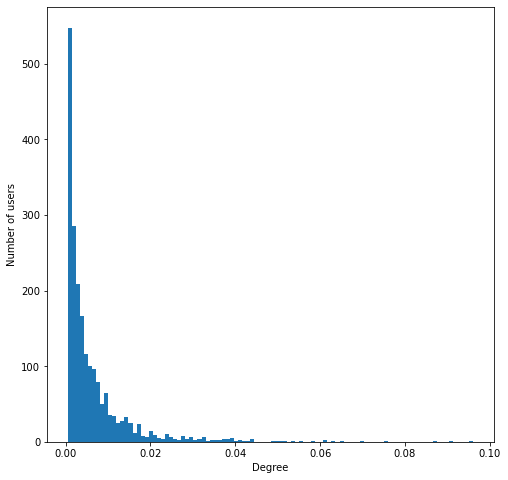

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(l, density=False, bins=100)
plt.ylabel('Number of users')
plt.xlabel('Degree');

This plot shows the density distribution of the degree associated to the users in the network. 

## Visualization func_2

In [ ]:
def visualization_2_metrics(gr:Graph, node, start, end, metric,n_intervals=4):
    s = int(start)
    e = int(end)
    intervall = e - s
    for i in range(0,intervall,intervall//n_intervals):
        with open('merged_graph_interval.json') as f:
            merged = json.load(f)
        gr = Graph(merged)
        start = s + i
        end = start + intervall//n_intervals
        
        gr.func_2(node, str(start), str(end), metric)

In [ ]:
def visualization_2_re(gr:Graph, node, start, end):
        with open('merged_graph_interval.json') as f:
            merged = json.load(f)
        gr = Graph(merged)
        gr.get_graph_in_intervall(start,end)
        g = nx.DiGraph()
        # nodes are the keys in our original dictionary
        g.add_nodes_from(list(gr.get_graph().keys()))
        # take values from original dictionary and add edges
        for k, v in gr.get_graph().items():
            for el in v:
                g.add_edge(k, el)
                # add weight to edge
                w = v.get(el)
                g[k][el]['weight'] = w.get('weight')

        plt.figure(figsize=(8, 8)) 

        nx.draw(g, node_size=20, alpha=0.05)

        ego_g = nx.ego_graph(g, node)
        d = dict(ego_g.degree)

        cols = ['orange' if node_ == node else 'lightblue' for node_ in ego_g] 

        nx.draw(ego_g, node_color=cols, 
                with_labels=True, 
                nodelist=d, node_size=600)

100%|████████████████████████████████████████████████████████████████████████| 13670/13670 [00:00<00:00, 853635.50it/s]


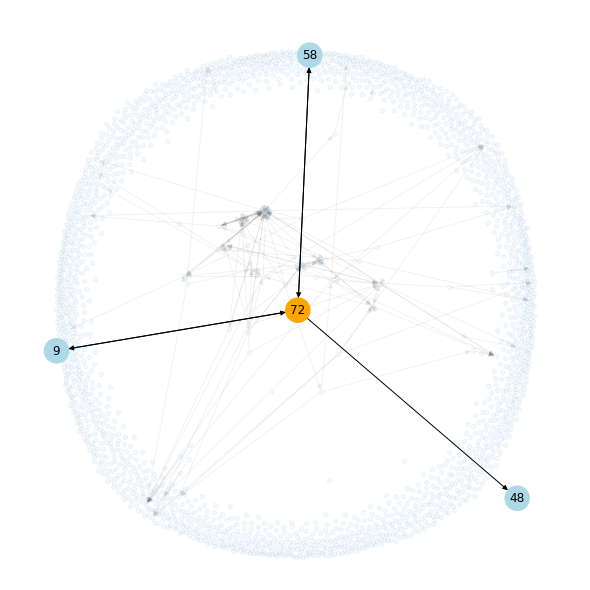

In [ ]:
visualization_2_re(graph_merged_interval,'72','20080801','20080803')

100%|████████████████████████████████████████████████████████████████████████| 13670/13670 [00:00<00:00, 853622.79it/s]


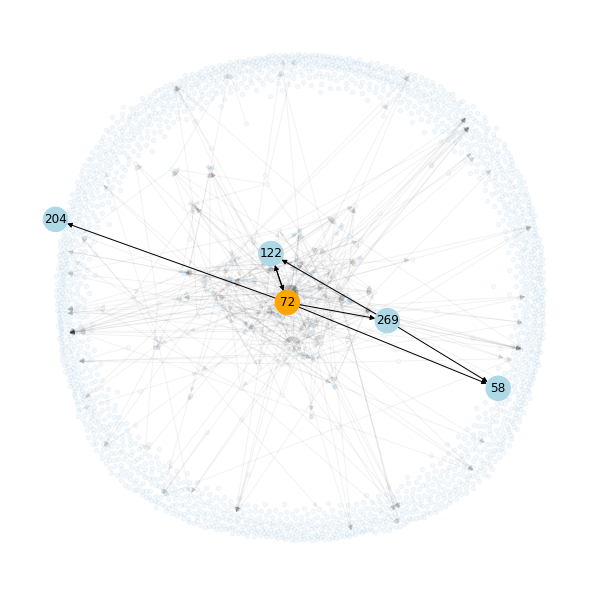

In [ ]:
visualization_2_re(graph_merged_interval,'72','20080803','20080805')

100%|████████████████████████████████████████████████████████████████████████| 13670/13670 [00:00<00:00, 853559.25it/s]


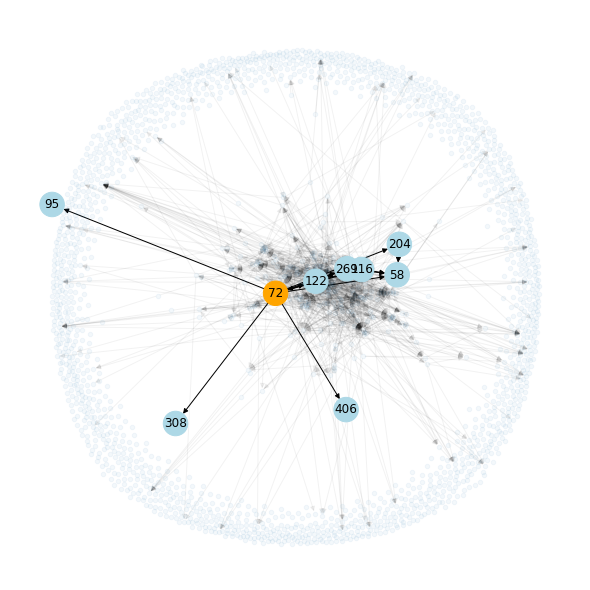

In [ ]:
visualization_2_re(graph_merged_interval,'72','20080805','20080807')

100%|████████████████████████████████████████████████████████████████████████| 13670/13670 [00:00<00:00, 853571.96it/s]


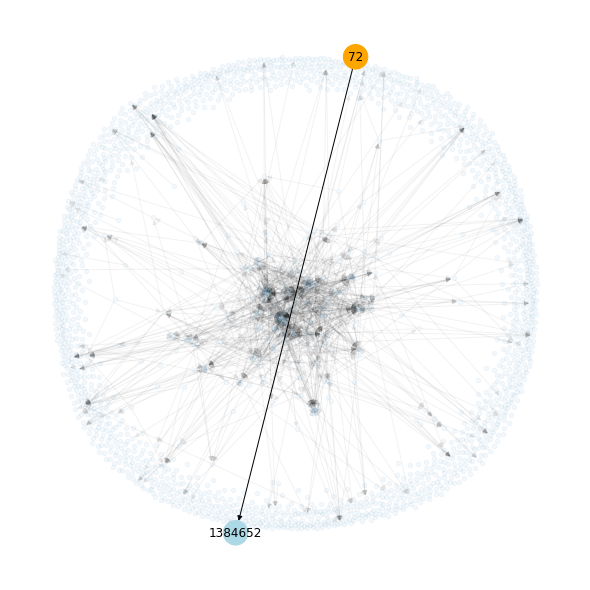

In [ ]:
visualization_2_re(graph_merged_interval,'72','20080807','20080809')

In [ ]:
visualization_2_metrics(graph_merged_interval,'72','20080801','20080809','DegreeCentrality')
visualization_2_metrics(graph_merged_interval,'72','20080801','20080809','ClosenessCentrality')
visualization_2_metrics(graph_merged_interval,'72','20080801','20080809','PageRank')

╒═══════════════════╤════════╤══════════════════╤════════════════╕
│ Interval          │   User │ Metric           │   Metric score │
╞═══════════════════╪════════╪══════════════════╪════════════════╡
│ 20080801-20080803 │     72 │ DegreeCentrality │     0.00430828 │
╘═══════════════════╧════════╧══════════════════╧════════════════╛
╒═══════════════════╤════════╤══════════════════╤════════════════╕
│ Interval          │   User │ Metric           │   Metric score │
╞═══════════════════╪════════╪══════════════════╪════════════════╡
│ 20080803-20080805 │     72 │ DegreeCentrality │     0.00382958 │
╘═══════════════════╧════════╧══════════════════╧════════════════╛
╒═══════════════════╤════════╤══════════════════╤════════════════╕
│ Interval          │   User │ Metric           │   Metric score │
╞═══════════════════╪════════╪══════════════════╪════════════════╡
│ 20080805-20080807 │     72 │ DegreeCentrality │     0.00718047 │
╘═══════════════════╧════════╧══════════════════╧═════════════

In [ ]:
graph_merged_interval.func_2('72','20080801','20080803','Betweeness')

100%|██████████| 13670/13670 [00:00<00:00, 555259.88it/s]


6.579804082321373e-05

In [ ]:
graph_merged_interval.func_2('72','20080805','20080807','Betweeness')

100%|██████████| 13670/13670 [00:00<00:00, 470554.59it/s]


0.00023315891120978524

### Analyzing the results. Visualization 2

The centrality measures seems to vary based on the portion of interval we consider. This is due to the fact that these scores are influenced by the number of adjacent nodes connected to the node considered, and, in general, by the the edges between the other verteces: as such, it is possible that at different times, certain certain edges may appear or disappear and change the value of our measures.

## Visualization func_3

In [ ]:
# create nx directed graph object
g = nx.DiGraph()
# nodes are the keys in our original dictionary
g.add_nodes_from(list(merged_graph.keys()))

# take values from original dictionary and add edges
for k, v in merged_graph.items():
  for el in v:
    g.add_edge(k, el)
    # add weight to edge
    w = v.get(el)
    g[k][el]['weight'] = w.get('weight')

In [ ]:
l = []
for previous, current in zip(route, route[1:]):
    p = previous, current
    l.append(p)
l

[('72', '116'),
 ('116', '192'),
 ('192', '51'),
 ('51', '67'),
 ('67', '83'),
 ('83', '91'),
 ('91', '35'),
 ('35', '91'),
 ('91', '308')]

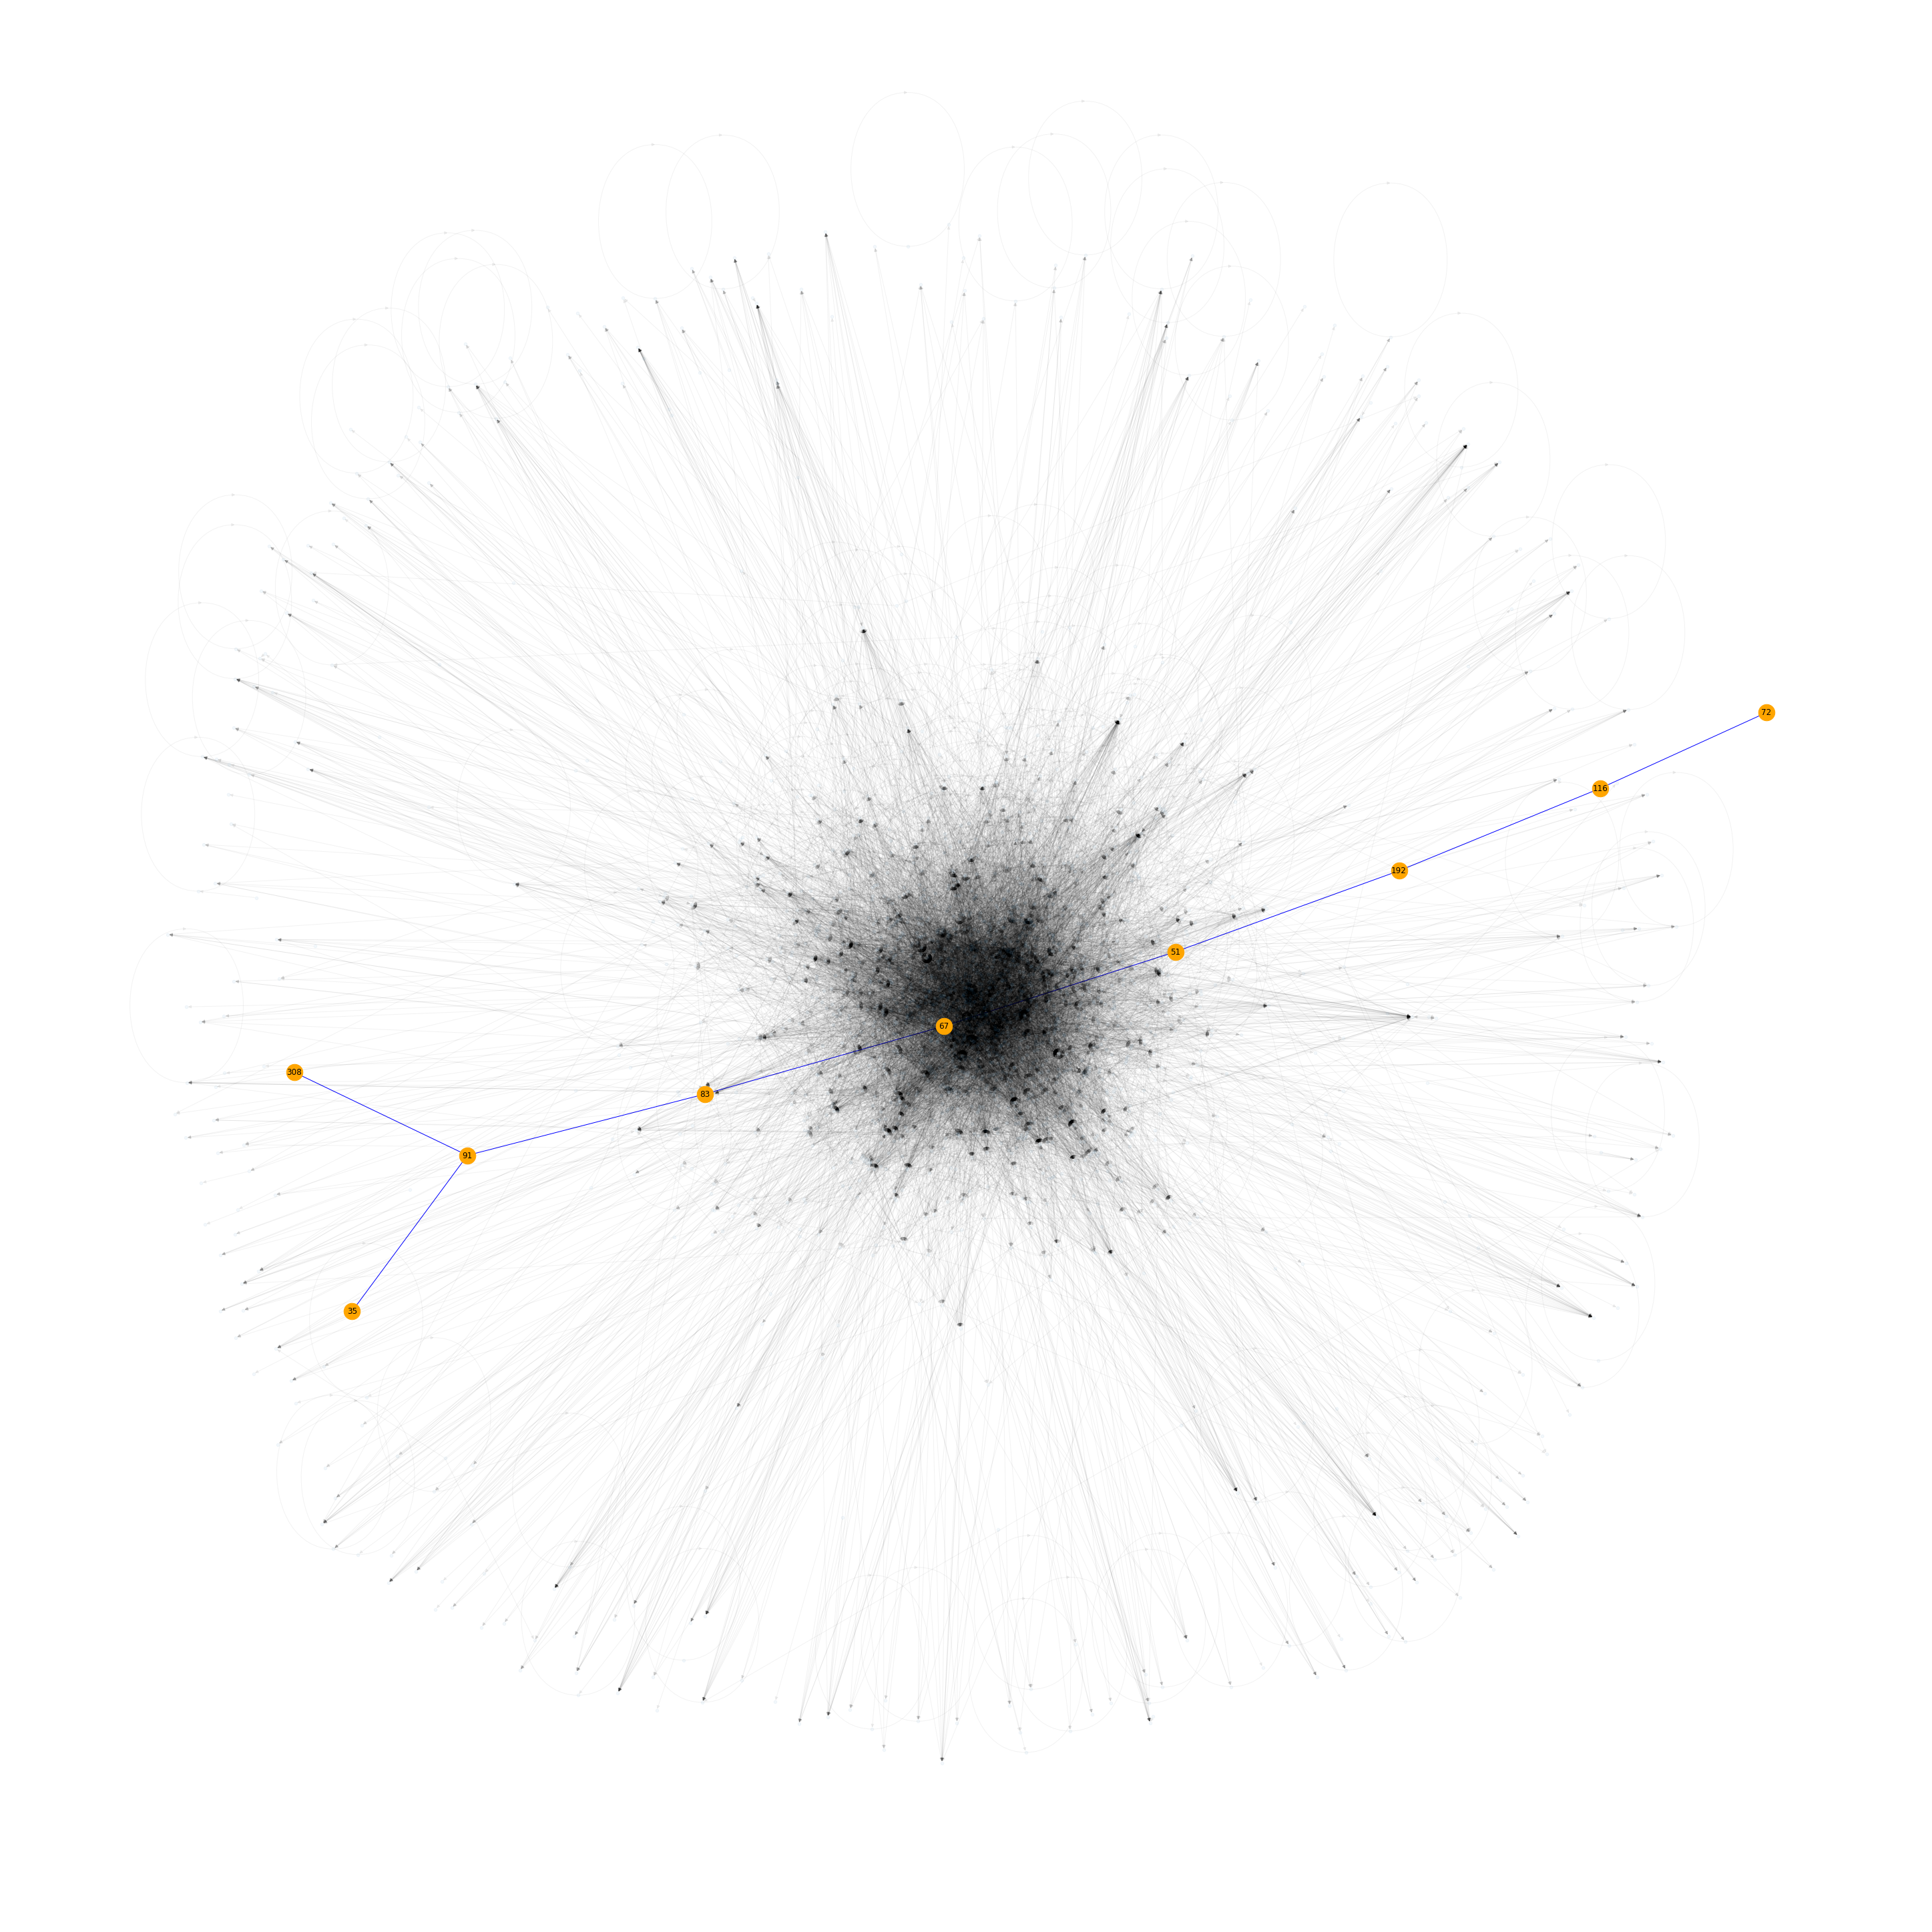

In [ ]:
fig = plt.figure(figsize=(40, 40)) 

# plot the whole graph
nx.draw(g, node_size=20, alpha=0.05)

# plot walk
g_walk = nx.Graph(l)
nx.draw(g_walk, node_size=600, edge_color='blue', node_color='orange', with_labels = True)
fig.savefig('walk.svg') 

plt.show()

## Visualization func_4

In [ ]:
# create nx directed graph object
g = nx.DiGraph()
# nodes are the keys in our original dictionary
g.add_nodes_from(list(merged_interval.get_graph().keys()))

# take values from original dictionary and add edges
for k, v in merged_interval.get_graph().items():
  for el in v:
    g.add_edge(k, el)
    # add weight to edge
    w = v.get(el)
    g[k][el]['weight'] = w.get('weight')

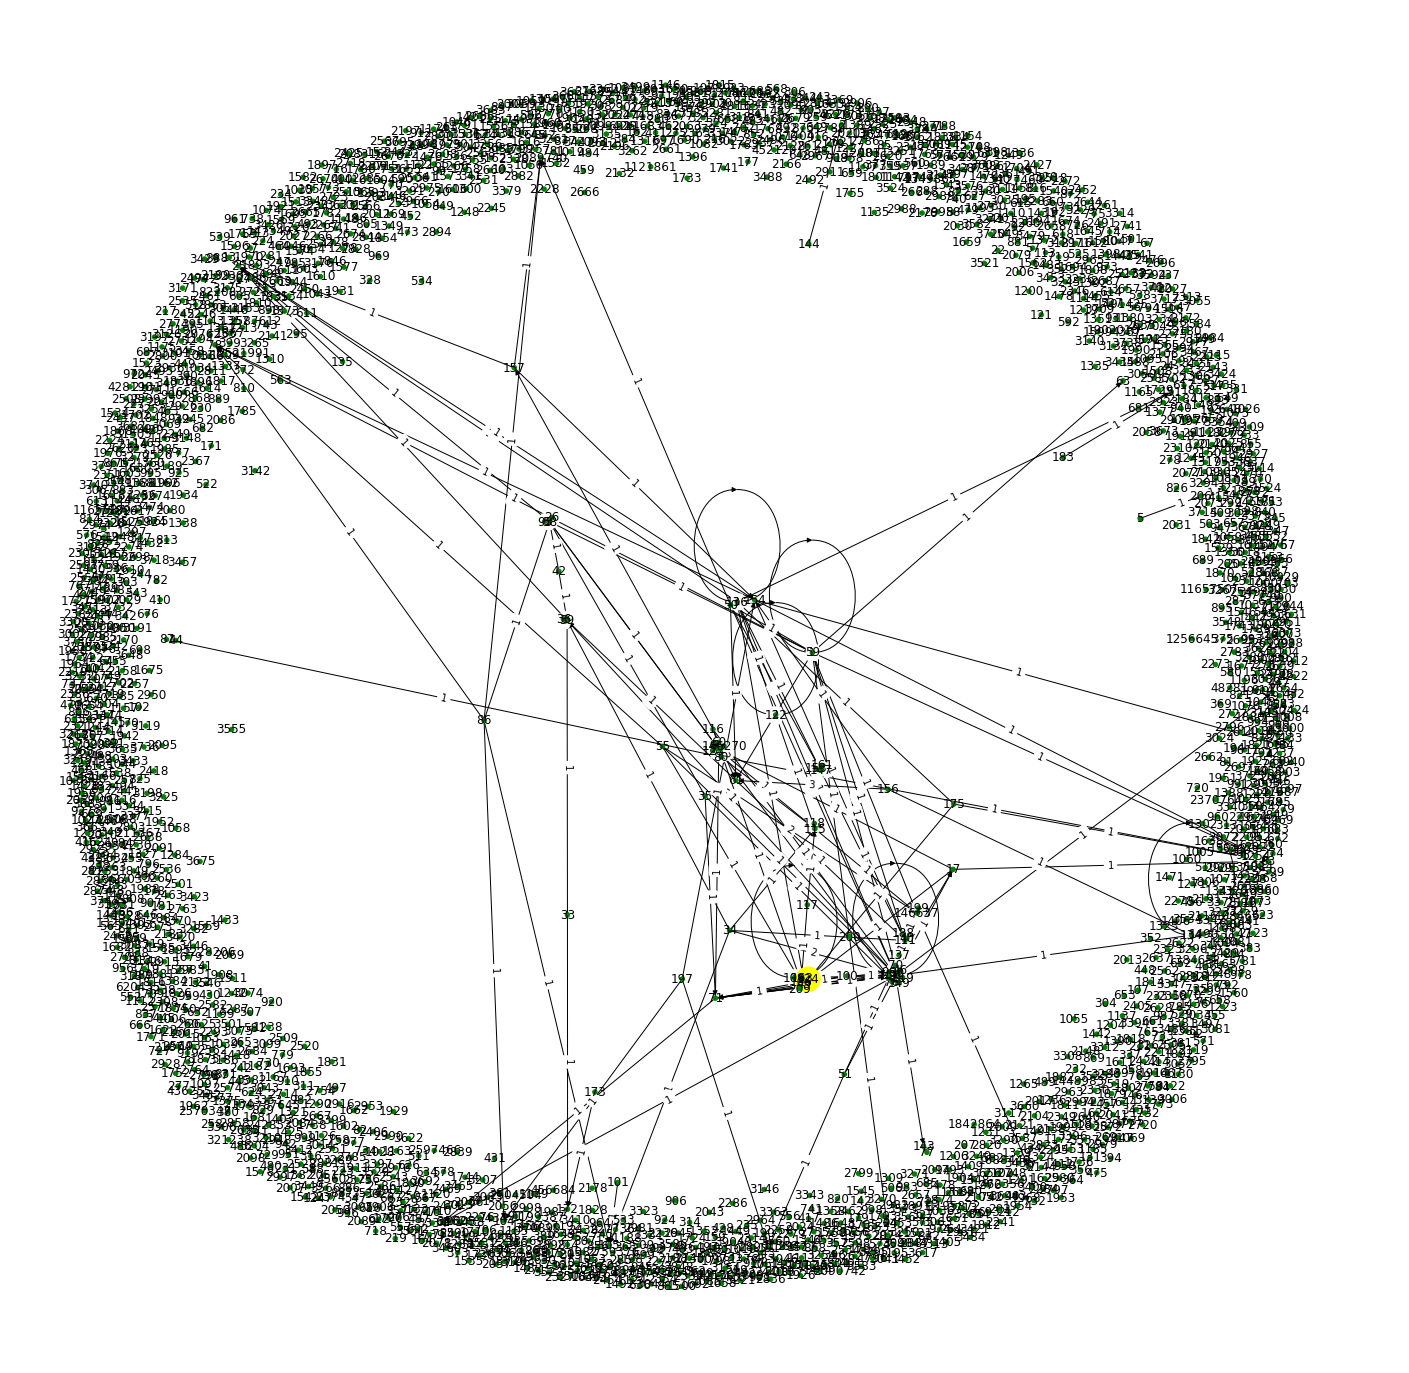

In [ ]:
fig = plt.figure(figsize=(25, 25)) 

group1 = (result[0])[0].split("|")

color_map = []
for node in g:
    if node in group1:
        color_map.append('yellow')
    else: 
       color_map.append('green')

size = []
for node in g:
    if node in group1:
        size.append(600)
    else: 
       size.append(20)

# plot 
pos = nx.spring_layout(g)
labels = nx.get_edge_attributes(g,'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = labels)
nx.draw(g, pos, node_size=size, with_labels=True, node_color=color_map )

plt.show()

Since the graph is not well-readable, we plot below a ego_graph of 124 together with its neighbours. We see that 124 is linked to only one node, 49. Upon further inspection, we discover that the edge linking them has weight 1, hence, by cutting it, we disconnect the graph and divide 124 by 49.

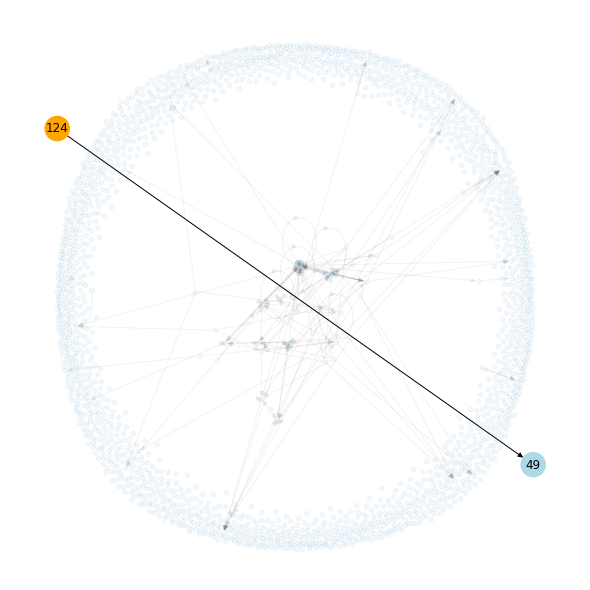

In [ ]:
plt.figure(figsize=(8, 8)) 

nx.draw(g, node_size=20, alpha=0.05)

ego_g = nx.ego_graph(g, group1[0])
d = dict(ego_g.degree)

cols = ['orange' if node_ == group1[0] else 'lightblue' for node_ in ego_g] 

nx.draw(ego_g, node_color=cols, 
        with_labels=True, 
        nodelist=d, node_size=600)

In [ ]:
weights[("124", "49")]

1

## Algorithmic Question

We decided to use Breadth-First Search as the algorithm to solve this question. 
We feed to the function an adjacency list, considering it as a graph, where every edge between the nodes indicate that those two children connected by it could possibly fight. What comes next is a pretty standard implementation of the BFS, which visits the graph in such a way that allows us to divide the children in the respective dorms and avoid conflicts: starting from a parent node and assigning it to a dormitory, we will then put its children in the opposite dormitory, the child's child in the opposite one, and so on. 
We also introduced some checks to guarantee that the division it is actually possible: in fact, the problem is not solvable if "triangles" of nodes are present in the adjacency list.

BFS runs in O(|V| + |E|). In our case, V = n (that is, the number of kids to be divided) and E = k (the number of kids that fight, which correspond to the edges in our graph). Therefore, our algorithm runs in O(|n| + |k|), as requested.

In [ ]:
from queue import Queue

In [ ]:
adj_list = {
    "A" : ["B", "D"],
    "B" : ["A", "C"],
    "C" : ["B"],
    "D" : ["A", "E", "F"],
    "E" : ["D", "F", "G"],
    "F" : ["D", "E", "H"],
    "G" : ["E", "H"],
    "H" : ["G", "F"]}



adj_list2 = {
    "A" : ["B", "D"],
    "B" : ["A", "C"],
    "C" : ["B"],
    "D" : ["A", "E"],
    "E" : ["D", "G"],
    "G" : ["E", "H"],
    "H" : ["G"]}


adj_list3 = {
"A" : ["B", "C"],
"B" : ["A", "D"],
"C" : ["A", "E"],
"D" : ["G"],
"E" : ["C", "F"],
"F" : ["E"],
"G" : ["D"]}

adj_list4 = {
"A" : ["B", "E"],
"B" : ["A", "C"],
"C" : ["B", "D"],
"D" : ["C", "E"],
"E" : ["A", "D"]
}

In [ ]:
# Breadth-First Search

def bfs(adj_list):

  # dictionary of the visited nodes
  visited = {}

  # dormitories
  dorm1 = []
  dorm2 = []

  # initialize an empty queue
  q = Queue()


  # iterate over all nodes in the graph
  for node in adj_list.keys():

    # initialize all nodes to not visited
    visited[node] = False


  # get first node of the adj. list as starting node
  s = next(iter(adj_list))

  # mark it as visited
  visited[s] = True

  # add it to the queue
  q.put(s)


  while not q.empty():

    # pop the first element of the queue 
    u = q.get()


    # if u is not in already in a dorm, assign it to dorm 1
    if u not in dorm1 and u not in dorm2:
      dorm1.append(u)



    # iterate over u's adjacent nodes
    for v in adj_list[u]:


      # mark adj. node as visited
      if not visited[v]:
        visited[v] = True

        # append adj. node to the dormitory where there is not its parent (i.e., dorm2) and check that no parent (in general, not u) is in dorm2
        # (that is, check that the intersection between the dorm1's list and the list with the parents of v is empty)
        if u in dorm1 and len(list(set(adj_list[v]) & set(dorm2))) == 0:
          dorm2.append(v)

        # check that no parent is in dormitory 1
        elif len(list(set(adj_list[v]) & set(dorm1))) == 0:
          dorm1.append(v)

        # if parents are in both dorms (case of odd-length cliques), the division is not possible
        else: 
          print("Not possible! Could not place", v, "in a dormitory without creating fights")
          break

        # add adj. node to queue
        q.put(v)


  print("dorm1: ", dorm1)
  print("dorm2: ", dorm2)


In [ ]:
bfs(adj_list)

Not possible! Could not place F in a dormitory without creating fights
dorm1:  ['A', 'C', 'E', 'H']
dorm2:  ['B', 'D', 'G']


In [ ]:
bfs(adj_list2)

dorm1:  ['A', 'C', 'E', 'H']
dorm2:  ['B', 'D', 'G']


In [ ]:
bfs(adj_list3)

dorm1:  ['A', 'D', 'E']
dorm2:  ['B', 'C', 'G', 'F']


In [ ]:
bfs(adj_list4)

Not possible! Could not place D in a dormitory without creating fights
dorm1:  ['A', 'C']
dorm2:  ['B', 'E']
